# Research on car sales ads

You're an analyst at Crankshaft List. Hundreds of free advertisements for vehicles are published on your site every day.

You need to study data collected over the last few years and determine which factors influence the price of a vehicle. 

### Step 1. Open the data file and study the general information. 

In [1]:
import pandas as pd
df = pd.read_csv('https://code.s3.yandex.net/datasets/vehicles_us.csv')
df

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,NaN,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,NaN,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,NaN,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,NaN,2018-07-02,71


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
price           51525 non-null int64
model_year      47906 non-null float64
model           51525 non-null object
condition       51525 non-null object
cylinders       46265 non-null float64
fuel            51525 non-null object
odometer        43633 non-null float64
transmission    51525 non-null object
type            51525 non-null object
paint_color     42258 non-null object
is_4wd          25572 non-null float64
date_posted     51525 non-null object
days_listed     51525 non-null int64
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [3]:
df.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


In [4]:
import numpy as np
df.describe(include=np.object)

,model,condition,fuel,transmission,type,paint_color,date_posted
count,51525,51525,51525,51525,51525,42258,51525
unique,100,6,5,3,13,12,354
top,ford f-150,excellent,gas,automatic,SUV,white,2019-03-17
freq,2796,24773,47288,46902,12405,10029,186


### Conclusion

We can see that we'll need to figure out why model_year, cylinders, odometer, paint_color and is_4wd columns have less non null objects then 51525 data entries. For sure, data types need some changing. From describe we see weird 0 in days_listed. Is_4wd column is Boolean, but has NaNs. Interesting. In odometer column min is 0, should check if its  really not ever used cars or a mistake. And my personal mysteries - what is that vintage bird of year 1908 - what is that with the price 375000? Rolls Royce?! and - what are they selling for 1 (are those -dollars?). Give me 5 of these!

### Step 2. Data preprocessing



I tried to look for duplicates before dealing with missing values. Searching as usual with all columns gives us 0 duplicates and thats why after long discussions in treads with our mentor it was decided to select every column except date_posted and days_listed because it was smth wrong with collecting data or "multiple entries for the same cars, so we need to keep only last one". 

In [5]:
df.duplicated().sum()

0

In [6]:
df_filtered_duplicates = df[df.duplicated(subset=['price', 'model_year', 'model', 'condition', 'cylinders', 'fuel', 'odometer', 'transmission', 'type', 'is_4wd', 'paint_color'], keep='last')]

In [7]:
df_filtered_duplicates

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50758,1250,2004.0,hyundai sonata,fair,4.0,gas,118000.0,automatic,sedan,white,NaN,2018-11-19,66
50846,12995,2016.0,ford fusion se,good,4.0,gas,63000.0,automatic,sedan,black,NaN,2018-12-22,97
50929,4950,2007.0,volkswagen jetta,excellent,5.0,gas,81688.0,automatic,sedan,white,NaN,2018-09-18,101
50936,7990,2012.0,subaru impreza,excellent,4.0,gas,110000.0,manual,hatchback,silver,1.0,2018-08-14,63


In [8]:
df.shape

(51525, 13)

In [9]:
#we ll drop duplicates in these clolumns and will reset index
df = df.drop((df[df.duplicated(subset=['price', 'model_year', 'model', 'condition', 'cylinders', 'fuel', 'odometer', 'transmission', 'type', 'paint_color', 'is_4wd'], keep='last')]).index).reset_index(drop=True)
df.shape


(44361, 13)

In [10]:
#checking for 0s
df.isnull().sum()

price               0
model_year       3535
model               0
condition           0
cylinders        5093
fuel                0
odometer         7488
transmission        0
type                0
paint_color      8681
is_4wd          22921
date_posted         0
days_listed         0
dtype: int64

In [11]:
#first we ll deal with boolean column
df['is_4wd'].value_counts()

1.0    21440
Name: is_4wd, dtype: int64

In [12]:
df[df.is_4wd.isnull()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
2,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
5,8990,2012.0,honda accord,excellent,4.0,gas,111142.0,automatic,sedan,grey,NaN,2019-03-28,29
8,5250,2007.0,toyota rav4,good,6.0,gas,154000.0,automatic,SUV,NaN,NaN,2018-08-22,8
11,3950,2009.0,chrysler 200,excellent,4.0,gas,NaN,automatic,sedan,red,NaN,2018-06-11,40
12,11499,2017.0,chevrolet malibu,like new,4.0,gas,NaN,automatic,sedan,NaN,NaN,2018-07-26,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...
44356,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,NaN,2018-10-03,37
44357,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,NaN,2018-11-14,22
44358,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,NaN,2018-11-15,32
44359,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,NaN,2018-07-02,71


In [13]:
allwheel= df[df['is_4wd'] == True]
allwheel

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
3,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
4,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17
6,12990,2009.0,gmc yukon,excellent,8.0,gas,132285.0,automatic,SUV,black,1.0,2019-01-31,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...
44343,29500,2012.0,toyota tundra,good,8.0,gas,NaN,automatic,pickup,grey,1.0,2018-05-01,31
44345,5980,2010.0,subaru impreza,excellent,4.0,gas,121778.0,manual,hatchback,white,1.0,2019-01-10,8
44349,17999,2014.0,ram 1500,like new,8.0,gas,154000.0,automatic,pickup,white,1.0,2018-06-21,11
44351,12000,2005.0,chevrolet silverado 2500hd,good,8.0,diesel,228000.0,automatic,pickup,silver,1.0,2018-08-18,52


In [14]:
#filling missing values 
df['is_4wd'].fillna(value = False, inplace = True)

In [15]:
notallwheel= df[df['is_4wd'] == False]
notallwheel

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
2,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,False,2019-03-22,9
5,8990,2012.0,honda accord,excellent,4.0,gas,111142.0,automatic,sedan,grey,False,2019-03-28,29
8,5250,2007.0,toyota rav4,good,6.0,gas,154000.0,automatic,SUV,NaN,False,2018-08-22,8
11,3950,2009.0,chrysler 200,excellent,4.0,gas,NaN,automatic,sedan,red,False,2018-06-11,40
12,11499,2017.0,chevrolet malibu,like new,4.0,gas,NaN,automatic,sedan,NaN,False,2018-07-26,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...
44356,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,False,2018-10-03,37
44357,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,False,2018-11-14,22
44358,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,False,2018-11-15,32
44359,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,False,2018-07-02,71


In [16]:
#checking and no MVs in is4wd column
df.isnull().sum()

price              0
model_year      3535
model              0
condition          0
cylinders       5093
fuel               0
odometer        7488
transmission       0
type               0
paint_color     8681
is_4wd             0
date_posted        0
days_listed        0
dtype: int64

In [17]:
df['model_year'].describe()

count    40826.000000
mean      2009.403566
std          6.443812
min       1908.000000
25%       2006.000000
50%       2010.000000
75%       2014.000000
max       2019.000000
Name: model_year, dtype: float64

In [18]:
#now we ll bild the pivot table to understand more about model_year column
model_year = df.pivot_table(index = 'model', values = 'model_year', aggfunc = ['mean', 'median', 'count', 'min', 'max'])
model_year

,mean,median,count,min,max
,model_year,model_year,model_year,model_year,model_year
model,,,,,
acura tl,2007.275000,2007.0,200,1999.0,2014.0
bmw x5,2008.876147,2010.0,218,2001.0,2018.0
buick enclave,2012.112745,2012.0,204,2008.0,2018.0
cadillac escalade,2008.434457,2008.0,267,1908.0,2019.0
chevrolet camaro,2007.619335,2012.0,331,1967.0,2019.0
...,...,...,...,...,...
toyota sienna,2008.447273,2008.0,275,1998.0,2019.0
toyota tacoma,2009.201693,2010.0,709,1989.0,2019.0


In [19]:
#searching for missing values
df[df.model_year.isnull()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1,2018-10-19,50
46,12800,NaN,ford f-150,excellent,6.0,gas,108500.0,automatic,pickup,white,False,2018-09-23,15
49,7800,NaN,ford f-150,like new,8.0,gas,97510.0,automatic,truck,white,1,2019-02-20,39
51,3650,NaN,subaru impreza,excellent,NaN,gas,74000.0,automatic,sedan,blue,1,2018-08-07,60
61,4995,NaN,hyundai elantra,like new,4.0,gas,151223.0,automatic,sedan,custom,False,2018-09-15,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
44300,8890,NaN,ford f250 super duty,good,8.0,gas,135778.0,automatic,truck,red,1,2018-11-28,24
44301,34595,NaN,gmc yukon,excellent,8.0,gas,86456.0,automatic,SUV,silver,1,2019-04-18,13
44323,1495,NaN,ford f-150,fair,6.0,gas,15804.0,manual,truck,white,1,2018-09-18,56
44324,21900,NaN,chevrolet silverado 3500hd,excellent,8.0,diesel,203000.0,automatic,truck,white,1,2018-12-27,37


In [20]:
# filling missing values with values grouped by model using transform
df['model_year'] = df['model_year'].fillna(df.groupby('model')['model_year'].transform('median')) 
df

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1,2018-06-23,19
1,25500,2011.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1,2018-10-19,50
2,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,False,2019-03-22,9
3,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1,2018-06-20,15
4,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1,2019-02-15,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
44356,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,False,2018-10-03,37
44357,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,False,2018-11-14,22
44358,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,False,2018-11-15,32
44359,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,False,2018-07-02,71



Why median? 
What i understood from our study discussions about diference in replacing missing values with mean and median is that mean is affected by outliers and extreme values and usually the distribution of income/salaries is not normal, so we should see if  the mean is really differs from median, its better to use median. 
What we see in model_year using describe - the mean and median is close to each other, but in our pivot table we see that for some models the mean and median has 2 years difference, so i decided to use median here.

In [21]:
# checking and magic!
df[df.model_year.isnull()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed


In [22]:
#checking for missing values
df[df.cylinders.isnull()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
4,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1,2019-02-15,17
21,10499,2013.0,chrysler 300,good,NaN,gas,88042.0,automatic,sedan,NaN,False,2018-05-05,22
22,7500,2005.0,toyota tacoma,good,NaN,gas,160000.0,automatic,pickup,NaN,False,2018-07-22,44
40,5200,2006.0,toyota highlander,good,NaN,gas,186000.0,automatic,SUV,green,False,2018-12-20,2
44,30000,1966.0,ford mustang,excellent,NaN,gas,51000.0,manual,convertible,red,False,2019-01-23,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
44265,3250,2004.0,toyota camry,good,NaN,gas,179412.0,automatic,sedan,NaN,False,2018-07-02,25
44278,28990,2018.0,ford f150,excellent,NaN,gas,10152.0,automatic,truck,white,1,2018-06-13,47
44296,5995,2007.0,ford fusion,excellent,NaN,gas,88977.0,manual,sedan,silver,False,2019-03-27,66
44313,6499,2007.0,acura tl,good,NaN,gas,112119.0,automatic,sedan,white,False,2018-06-22,28


In [23]:
df['cylinders'].describe()

count    39268.000000
mean         6.061042
std          1.652855
min          3.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         12.000000
Name: cylinders, dtype: float64

In [24]:
#pivot table to see values of cylinders for models of different years 
cylinders = df.pivot_table(index = ['model', 'model_year'], values = 'cylinders', aggfunc = ['mean','median', 'count', 'max','min'])
cylinders

mean    median     count       max       min
                             cylinders cylinders cylinders cylinders cylinders
model             model_year                                                  
acura tl          1999.0      6.000000       6.0         2       6.0       6.0
                  2001.0      6.000000       6.0         6       6.0       6.0
                  2002.0      6.000000       6.0         2       6.0       6.0
                  2003.0      6.000000       6.0         9       6.0       6.0
                  2004.0      5.866667       6.0        15       6.0       4.0
...                                ...       ...       ...       ...       ...
volkswagen passat 2014.0      4.025000       4.0        40       5.0       4.0
                  2015.0      4.043478       4.0        23       5.0       4.0
                  2016.0      4.222222       4.0         9       6.0       4.0
                  2017.0      4.000000       4.0         9       4.0       4.0
                  2018.0      4.000000       4.0         1       4.0       4.0

[2230 rows x 5 columns]

In [25]:
#filling missing values with values grouped by model and model_year using transform
df['cylinders'] = df['cylinders'].fillna(df.groupby(['model', 'model_year'])['cylinders'].transform('mean')) 
df.head(15)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1,2018-06-23,19
1,25500,2011.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1,2018-10-19,50
2,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,False,2019-03-22,9
3,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1,2018-06-20,15
4,9200,2008.0,honda pilot,excellent,6.0,gas,147191.0,automatic,SUV,blue,1,2019-02-15,17
5,8990,2012.0,honda accord,excellent,4.0,gas,111142.0,automatic,sedan,grey,False,2019-03-28,29
6,12990,2009.0,gmc yukon,excellent,8.0,gas,132285.0,automatic,SUV,black,1,2019-01-31,24
7,17990,2013.0,ram 1500,excellent,8.0,gas,NaN,automatic,pickup,red,1,2018-05-15,111
8,5250,2007.0,toyota rav4,good,6.0,gas,154000.0,automatic,SUV,NaN,False,2018-08-22,8
9,7500,2004.0,chevrolet silverado,like new,8.0,gas,180000.0,automatic,truck,red,1,2019-01-05,64


In [26]:
#checking...and still some missing values
df.cylinders.isnull().sum()

26

In [27]:
#26 Mis values are not so critical for our data, so we can replace it with mode for cylinders
df.cylinders.mode()

0    8.0
dtype: float64

In [28]:
df.cylinders = df.cylinders.fillna(value = 8.0)
df.cylinders.isnull().sum()

0

In [29]:
#we have some cars with 0 milage which are not new, its hard to believe, but anything could happen - maybe they were just standing somewhere
#so we ll keep them like this
milage0 = df[df['odometer'] == 0]
milage0

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
650,2995,1999.0,ford f-150,good,6.000000,gas,0.0,manual,truck,NaN,False,2019-03-14,16
1070,5888,2006.0,toyota 4runner,good,6.000000,gas,0.0,automatic,SUV,black,False,2019-02-22,36
1141,1000,1992.0,gmc sierra 1500,good,8.000000,gas,0.0,automatic,truck,NaN,False,2018-09-28,47
1620,30000,1969.0,chevrolet corvette,excellent,8.000000,other,0.0,automatic,convertible,white,False,2018-08-01,20
1994,3000,2006.0,honda civic,good,4.235294,gas,0.0,automatic,sedan,silver,False,2018-06-02,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
41947,8987,2011.0,honda cr-v,good,4.000000,gas,0.0,automatic,SUV,custom,1,2019-02-18,38
42173,3300,2002.0,hyundai santa fe,good,6.000000,gas,0.0,automatic,wagon,white,1,2019-02-15,7
43260,25500,2008.0,jeep wrangler,good,6.000000,gas,0.0,automatic,SUV,yellow,1,2018-06-12,48
43472,3600,2012.0,chrysler 200,good,4.000000,gas,0.0,automatic,sedan,red,False,2018-07-24,90


<font color='purple'>Student's commentary:</font> 
Here we see in cylinders using describe and in pivot table - the mean and median is almost the same, so i decided to use mean here.

In [30]:
#we better look for missing values
df[df.odometer.isnull()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
2,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,False,2019-03-22,9
7,17990,2013.0,ram 1500,excellent,8.0,gas,NaN,automatic,pickup,red,1,2018-05-15,111
10,7500,2004.0,jeep wrangler,good,6.0,gas,NaN,automatic,SUV,red,1,2018-05-17,39
11,3950,2009.0,chrysler 200,excellent,4.0,gas,NaN,automatic,sedan,red,False,2018-06-11,40
12,11499,2017.0,chevrolet malibu,like new,4.0,gas,NaN,automatic,sedan,NaN,False,2018-07-26,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...
44334,15900,2011.0,gmc sierra 1500,excellent,8.0,gas,NaN,automatic,truck,NaN,1,2019-01-25,69
44343,29500,2012.0,toyota tundra,good,8.0,gas,NaN,automatic,pickup,grey,1,2018-05-01,31
44352,8999,2011.0,jeep grand cherokee,good,6.0,gas,NaN,automatic,SUV,white,1,2018-11-01,51
44355,11750,2015.0,honda accord,excellent,4.0,gas,NaN,automatic,coupe,NaN,False,2018-11-24,89


In [31]:
df['odometer'].describe()

count     36873.000000
mean     118504.040816
std       65803.522348
min           0.000000
25%       73539.000000
50%      116143.000000
75%      158125.000000
max      990000.000000
Name: odometer, dtype: float64

In [101]:
odometer = df.pivot_table(index = 'model_year', values = 'odometer', aggfunc = ['mean', 'median'])
odometer

,mean,median
,odometer,odometer
model_year,,
1908,169328.000000,169328.0
1936,30000.000000,30000.0
1948,4000.000000,4000.0
1949,1800.000000,1800.0
1954,3565.000000,3565.0
...,...,...
2015,82746.881311,78272.0
2016,61772.994901,55659.0


In [106]:
#we fill missing values with mean grouped by model_year with transform method
df['odometer_fill'] = df['odometer'].fillna(df.groupby('model_year')['odometer'].transform('median'))
df

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,odometer_fill,date,weekday,month,year,age,avg_mileage_year
0,9400.0,2011,bmw x5,2,6,gas,145000.0,automatic,SUV,other,True,2018-06-23,19,145000.0,2018-06-23,5,6,2018,7,20714
1,25500.0,2011,ford f-150,2,6,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,88705.0,2018-10-19,4,10,2018,7,12672
2,1500.0,2003,ford f-150,1,8,gas,NaN,automatic,pickup,other,False,2019-03-22,9,162771.5,2019-03-22,4,3,2019,16,10210
3,14990.0,2014,chrysler 300,3,6,gas,57954.0,automatic,sedan,black,True,2018-06-20,15,57954.0,2018-06-20,2,6,2018,4,14488
4,9200.0,2008,honda pilot,3,6,gas,147191.0,automatic,SUV,blue,True,2019-02-15,17,147191.0,2019-02-15,4,2,2019,11,13381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44356,9249.0,2013,nissan maxima,4,6,gas,88136.0,automatic,sedan,black,False,2018-10-03,37,88136.0,2018-10-03,2,10,2018,5,17627
44357,2700.0,2002,honda civic,0,4,gas,181500.0,automatic,sedan,white,False,2018-11-14,22,181500.0,2018-11-14,2,11,2018,16,11343
44358,3950.0,2009,hyundai sonata,3,4,gas,128000.0,automatic,sedan,blue,False,2018-11-15,32,128000.0,2018-11-15,3,11,2018,9,14222
44359,7455.0,2013,toyota corolla,2,4,gas,139573.0,automatic,sedan,black,False,2018-07-02,71,139573.0,2018-07-02,0,7,2018,5,27914


<font color='purple'>Student's commentary:</font> 
What we see in odometer using describe and in pivot table - the mean and median is close to each other, but in one year it can be cars with different mileage, so it may affect the mean, so i decided to use median here.

In [34]:
#and we still have 1 MV
df[df.odometer_fill.isnull()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,odometer_fill
38823,18000,1929.0,ford f-150,good,8.0,gas,NaN,manual,other,silver,False,2018-11-18,59,NaN


In [103]:
g= df.pivot_table(index = 'model', values = 'odometer_fill', aggfunc = 'median')
g

,odometer_fill
model,
acura tl,141280.0
bmw x5,112970.0
buick enclave,110000.0
cadillac escalade,135537.5
chevrolet camaro,70000.0
...,...
toyota sienna,142678.0
toyota tacoma,127489.0
toyota tundra,131984.0


In [104]:
#we will replace it manually with the value for this model
g.query('model == "ford f-150"')

,odometer_fill
model,
ford f-150,123000.0


In [105]:
df.odometer_fill = df['odometer_fill'].fillna(value = 123000.0)
#check...and all good
df[df.odometer_fill.isnull()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,odometer_fill,date,weekday,month,year,age,avg_mileage_year


In [38]:
df.paint_color.value_counts()

white     8134
black     6354
silver    5432
grey      4331
blue      3935
red       3826
green     1221
brown     1057
custom     932
yellow     195
orange     175
purple      88
Name: paint_color, dtype: int64

In [39]:
#looking for missing values 
df[df.paint_color.isnull()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,odometer_fill
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1,2018-06-23,19,145000.000000
2,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,False,2019-03-22,9,163360.599631
8,5250,2007.0,toyota rav4,good,6.0,gas,154000.0,automatic,SUV,NaN,False,2018-08-22,8,154000.000000
12,11499,2017.0,chevrolet malibu,like new,4.0,gas,NaN,automatic,sedan,NaN,False,2018-07-26,43,48364.237387
17,11999,2017.0,toyota camry le,excellent,4.0,gas,35721.0,automatic,sedan,NaN,False,2018-09-13,25,35721.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44338,7995,2011.0,chevrolet equinox,like new,4.0,gas,111088.0,automatic,SUV,NaN,False,2019-04-01,175,111088.000000
44339,6595,2011.0,chevrolet malibu,excellent,4.0,gas,100780.0,automatic,sedan,NaN,False,2019-02-27,73,100780.000000
44342,28900,2017.0,ford f150 supercrew cab xlt,good,6.0,gas,49225.0,automatic,pickup,NaN,1,2019-04-11,25,49225.000000
44355,11750,2015.0,honda accord,excellent,4.0,gas,NaN,automatic,coupe,NaN,False,2018-11-24,89,82982.568374


In [40]:
#we dont know what color it was, we could you use mode and it would be cahnged to white, but closer to truth is sign them as other
df.paint_color.fillna(value = ('other'), inplace = True)
df.isnull().sum()

price               0
model_year          0
model               0
condition           0
cylinders           0
fuel                0
odometer         7488
transmission        0
type                0
paint_color         0
is_4wd              0
date_posted         0
days_listed         0
odometer_fill       0
dtype: int64

In [41]:
#checking for datatypes
df.dtypes

price              int64
model_year       float64
model             object
condition         object
cylinders        float64
fuel              object
odometer         float64
transmission      object
type              object
paint_color       object
is_4wd            object
date_posted       object
days_listed        int64
odometer_fill    float64
dtype: object

In [42]:
#changing float to int because its easier to work and look at whole number
df.model_year = df.model_year.astype('int')
df.is_4wd = df.is_4wd.astype('bool')
df['price'] = df['price'].astype('float')
df['cylinders'] = df['cylinders'].astype('int')
df.dtypes

price            float64
model_year         int64
model             object
condition         object
cylinders          int64
fuel              object
odometer         float64
transmission      object
type              object
paint_color       object
is_4wd              bool
date_posted       object
days_listed        int64
odometer_fill    float64
dtype: object

In [43]:
#in condition column we see some cars to be NEW
df.condition.value_counts()

excellent    21419
good         16823
like new      4279
fair          1585
new            142
salvage        113
Name: condition, dtype: int64

In [44]:
#we ll check if it is really like this, but no cars with milage 0
df[(df.condition =='new') & (df.odometer_fill == 0)]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,odometer_fill


In [45]:
#we better call them 'claimed as new'
df.loc[df['condition'] == 'new', 'condition'] = 'claimed as new'

df.condition.value_counts()

excellent         21419
good              16823
like new           4279
fair               1585
claimed as new      142
salvage             113
Name: condition, dtype: int64

In [46]:
#checking for 0s  
df.days_listed.isin([0]).sum()

49

In [47]:
#We want to see values in 'date_posted' mathching with 0's in 'days_listed'. There so no realy mathcing, all dates are different 
df.query('days_listed == 0').sort_values(by='date_posted', ascending = False).head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,odometer_fill
20700,9950.0,2008,toyota tundra,good,6,gas,229000.0,automatic,truck,red,False,2019-04-16,0,229000.0
24994,9995.0,2006,chevrolet silverado 1500,excellent,7,gas,115000.0,automatic,pickup,grey,True,2019-04-11,0,115000.0
7804,4999.0,2012,nissan sentra,excellent,4,gas,125000.0,automatic,sedan,silver,False,2019-03-26,0,125000.0
22279,10995.0,2010,chevrolet silverado 1500,good,8,gas,165178.0,automatic,truck,grey,True,2019-03-18,0,165178.0
14594,14995.0,2006,ford f350 super duty,excellent,8,gas,126650.0,automatic,truck,white,False,2019-03-15,0,126650.0


In [48]:
#The freshest entrie day is 2019-04-16 
#for now we ll leave 0's in 'days_listed' 
df.sort_values(by='date_posted', ascending = False).head()


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,odometer_fill
36248,9788.0,2010,toyota prius,excellent,4,hybrid,83050.0,automatic,hatchback,other,False,2019-04-19,63,83050.0
21285,9200.0,2004,toyota tacoma,good,6,gas,319000.0,automatic,pickup,red,True,2019-04-19,65,319000.0
41774,5995.0,2006,honda odyssey,excellent,6,gas,174000.0,automatic,mini-van,black,False,2019-04-19,58,174000.0
7905,23995.0,2013,ford f-150,excellent,8,gas,102015.0,automatic,truck,other,True,2019-04-19,16,102015.0
1605,9850.0,2004,ford f250 super duty,excellent,8,diesel,215000.0,automatic,pickup,other,True,2019-04-19,57,215000.0


In [49]:
#now we ll deal with duplicates, but 
df.duplicated().sum()

0

In [50]:
df.shape


(44361, 14)

In [51]:
df_filtered_duplicates = df[df.duplicated(subset=['price', 'model_year', 'model', 'condition', 'cylinders', 'fuel', 'odometer_fill', 'transmission', 'type', 'is_4wd', 'paint_color'], keep='last')]


In [52]:
df_filtered_duplicates.shape

(781, 14)

In [53]:
#now - my personal interest - what are these cars 110 y old
#i investigate a bit and this might be a mistake because gmc company was founded in 1908, but yukon model is not sooo old
#and cadillac launched the escaled model just in 1998
#so it might be 1998 year, not 1908, but for now we ll leave it like this
df.query('model_year == "1908"')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,odometer_fill
28182,12995.0,1908,gmc yukon,good,8,gas,169328.0,automatic,SUV,black,False,2018-07-06,34,169328.0
28183,12995.0,1908,cadillac escalade,excellent,8,gas,NaN,automatic,SUV,white,False,2018-06-24,25,169328.0


In [54]:
#the most expensive car is nissan frontier 1999 year. Most cars like this cost from 5000-20000 $
#but we dont know exactly what is so special about it, maybe its totally from Gold
df.query('price == "375000"')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,odometer_fill
10050,375000.0,1999,nissan frontier,good,6,gas,115000.0,automatic,pickup,blue,True,2018-05-19,21,115000.0


In [55]:
#wow! 1 dollar cars!
df.query('price == "1"')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,odometer_fill
313,1.0,2014,chevrolet camaro,excellent,6,gas,71310.0,automatic,coupe,other,False,2018-07-14,29,71310.000000
2428,1.0,1998,chevrolet silverado,good,8,gas,164000.0,automatic,pickup,other,True,2018-10-11,49,164000.000000
3001,1.0,2007,chevrolet tahoe,good,8,gas,200.0,automatic,SUV,red,False,2019-03-18,63,200.000000
3087,1.0,1996,ford f-150,fair,7,gas,163000.0,manual,truck,white,False,2019-02-23,54,163000.000000
3297,1.0,2004,chevrolet silverado,excellent,8,diesel,83000.0,automatic,pickup,other,True,2019-02-04,14,83000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42567,1.0,2007,chevrolet trailblazer,excellent,8,gas,NaN,automatic,SUV,black,True,2018-08-06,28,144242.458430
42577,1.0,2010,ford f150,excellent,8,gas,139700.0,other,pickup,red,True,2019-03-11,18,139700.000000
43095,1.0,1986,chevrolet silverado,good,8,gas,NaN,automatic,truck,red,True,2018-11-30,50,115634.517241
43242,1.0,2003,gmc sierra 2500hd,good,8,diesel,212300.0,automatic,pickup,black,True,2019-04-12,28,212300.000000


We cleaned our data - filled where needed Missing values, figured out that condition new is not so new and days_listed are kind of messed up. We dropped the duplicates and ready for calculations.

### Step 3. Make calculations and add them to the table

In [56]:
#we ll convert str date_posted to datetime and add columns with day, month and year
import pandas as pd
df['date'] = pd.to_datetime(df['date_posted'], format = '%Y-%m-%d')
df['weekday'] = df['date'].dt.weekday
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
df

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,odometer_fill,date,weekday,month,year
0,9400.0,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,other,True,2018-06-23,19,145000.000000,2018-06-23,5,6,2018
1,25500.0,2011,ford f-150,good,6,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,88705.000000,2018-10-19,4,10,2018
2,1500.0,2003,ford f-150,fair,8,gas,NaN,automatic,pickup,other,False,2019-03-22,9,163360.599631,2019-03-22,4,3,2019
3,14990.0,2014,chrysler 300,excellent,6,gas,57954.0,automatic,sedan,black,True,2018-06-20,15,57954.000000,2018-06-20,2,6,2018
4,9200.0,2008,honda pilot,excellent,6,gas,147191.0,automatic,SUV,blue,True,2019-02-15,17,147191.000000,2019-02-15,4,2,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44356,9249.0,2013,nissan maxima,like new,6,gas,88136.0,automatic,sedan,black,False,2018-10-03,37,88136.000000,2018-10-03,2,10,2018
44357,2700.0,2002,honda civic,salvage,4,gas,181500.0,automatic,sedan,white,False,2018-11-14,22,181500.000000,2018-11-14,2,11,2018
44358,3950.0,2009,hyundai sonata,excellent,4,gas,128000.0,automatic,sedan,blue,False,2018-11-15,32,128000.000000,2018-11-15,3,11,2018
44359,7455.0,2013,toyota corolla,good,4,gas,139573.0,automatic,sedan,black,False,2018-07-02,71,139573.000000,2018-07-02,0,7,2018


In [57]:
#adding column with age of vehicle
df['age'] = df['year'] - df['model_year']
df

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,odometer_fill,date,weekday,month,year,age
0,9400.0,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,other,True,2018-06-23,19,145000.000000,2018-06-23,5,6,2018,7
1,25500.0,2011,ford f-150,good,6,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,88705.000000,2018-10-19,4,10,2018,7
2,1500.0,2003,ford f-150,fair,8,gas,NaN,automatic,pickup,other,False,2019-03-22,9,163360.599631,2019-03-22,4,3,2019,16
3,14990.0,2014,chrysler 300,excellent,6,gas,57954.0,automatic,sedan,black,True,2018-06-20,15,57954.000000,2018-06-20,2,6,2018,4
4,9200.0,2008,honda pilot,excellent,6,gas,147191.0,automatic,SUV,blue,True,2019-02-15,17,147191.000000,2019-02-15,4,2,2019,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44356,9249.0,2013,nissan maxima,like new,6,gas,88136.0,automatic,sedan,black,False,2018-10-03,37,88136.000000,2018-10-03,2,10,2018,5
44357,2700.0,2002,honda civic,salvage,4,gas,181500.0,automatic,sedan,white,False,2018-11-14,22,181500.000000,2018-11-14,2,11,2018,16
44358,3950.0,2009,hyundai sonata,excellent,4,gas,128000.0,automatic,sedan,blue,False,2018-11-15,32,128000.000000,2018-11-15,3,11,2018,9
44359,7455.0,2013,toyota corolla,good,4,gas,139573.0,automatic,sedan,black,False,2018-07-02,71,139573.000000,2018-07-02,0,7,2018,5


In [58]:
#calculating average milage per year with function with try except because of 0 age of vehicles 
def avg_mileage_year(row):
    age = row['age']
    mileage = row['odometer_fill']
    try:
        return mileage / age
    except:
        return mileage
    
df['avg_mileage_year'] = df.apply(avg_mileage_year, axis=1)

In [59]:
df['avg_mileage_year'] = df['avg_mileage_year'].astype(int)
df

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,odometer_fill,date,weekday,month,year,age,avg_mileage_year
0,9400.0,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,other,True,2018-06-23,19,145000.000000,2018-06-23,5,6,2018,7,20714
1,25500.0,2011,ford f-150,good,6,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,88705.000000,2018-10-19,4,10,2018,7,12672
2,1500.0,2003,ford f-150,fair,8,gas,NaN,automatic,pickup,other,False,2019-03-22,9,163360.599631,2019-03-22,4,3,2019,16,10210
3,14990.0,2014,chrysler 300,excellent,6,gas,57954.0,automatic,sedan,black,True,2018-06-20,15,57954.000000,2018-06-20,2,6,2018,4,14488
4,9200.0,2008,honda pilot,excellent,6,gas,147191.0,automatic,SUV,blue,True,2019-02-15,17,147191.000000,2019-02-15,4,2,2019,11,13381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44356,9249.0,2013,nissan maxima,like new,6,gas,88136.0,automatic,sedan,black,False,2018-10-03,37,88136.000000,2018-10-03,2,10,2018,5,17627
44357,2700.0,2002,honda civic,salvage,4,gas,181500.0,automatic,sedan,white,False,2018-11-14,22,181500.000000,2018-11-14,2,11,2018,16,11343
44358,3950.0,2009,hyundai sonata,excellent,4,gas,128000.0,automatic,sedan,blue,False,2018-11-15,32,128000.000000,2018-11-15,3,11,2018,9,14222
44359,7455.0,2013,toyota corolla,good,4,gas,139573.0,automatic,sedan,black,False,2018-07-02,71,139573.000000,2018-07-02,0,7,2018,5,27914


In [60]:
#writing a function for condition column
def condition_number(row):
    condition = row['condition']
        
    if condition == 'claimed as new':
        return 5
    elif condition == 'like new':
        return 4
    elif condition == 'excellent':
        return 3
    elif condition == 'good':
        return 2
    elif condition == 'fair':
        return 1
    elif condition == 'salvage':
        return 0
        
        
df['condition'] = df.apply(condition_number, axis = 1)
df

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,odometer_fill,date,weekday,month,year,age,avg_mileage_year
0,9400.0,2011,bmw x5,2,6,gas,145000.0,automatic,SUV,other,True,2018-06-23,19,145000.000000,2018-06-23,5,6,2018,7,20714
1,25500.0,2011,ford f-150,2,6,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,88705.000000,2018-10-19,4,10,2018,7,12672
2,1500.0,2003,ford f-150,1,8,gas,NaN,automatic,pickup,other,False,2019-03-22,9,163360.599631,2019-03-22,4,3,2019,16,10210
3,14990.0,2014,chrysler 300,3,6,gas,57954.0,automatic,sedan,black,True,2018-06-20,15,57954.000000,2018-06-20,2,6,2018,4,14488
4,9200.0,2008,honda pilot,3,6,gas,147191.0,automatic,SUV,blue,True,2019-02-15,17,147191.000000,2019-02-15,4,2,2019,11,13381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44356,9249.0,2013,nissan maxima,4,6,gas,88136.0,automatic,sedan,black,False,2018-10-03,37,88136.000000,2018-10-03,2,10,2018,5,17627
44357,2700.0,2002,honda civic,0,4,gas,181500.0,automatic,sedan,white,False,2018-11-14,22,181500.000000,2018-11-14,2,11,2018,16,11343
44358,3950.0,2009,hyundai sonata,3,4,gas,128000.0,automatic,sedan,blue,False,2018-11-15,32,128000.000000,2018-11-15,3,11,2018,9,14222
44359,7455.0,2013,toyota corolla,2,4,gas,139573.0,automatic,sedan,black,False,2018-07-02,71,139573.000000,2018-07-02,0,7,2018,5,27914


We calculated and added new columns day, month, year, avg mileage per year to our data and gave car conditions numerical values.

### Step 4. Carry out exploratory data analysis

In [61]:
df['price'].describe()

count     44361.000000
mean      11682.128626
std        9888.712164
min           1.000000
25%        4995.000000
50%        8900.000000
75%       15900.000000
max      375000.000000
Name: price, dtype: float64

In [62]:
df['age'].describe()

count    44361.000000
mean         8.842880
std          6.244234
min          0.000000
25%          5.000000
50%          8.000000
75%         12.000000
max        110.000000
Name: age, dtype: float64

In [63]:
df['condition'].describe()

count    44361.000000
mean         2.644530
std          0.726629
min          0.000000
25%          2.000000
50%          3.000000
75%          3.000000
max          5.000000
Name: condition, dtype: float64

In [64]:
df['cylinders'].describe()

count    44361.000000
mean         6.025022
std          1.635262
min          3.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         12.000000
Name: cylinders, dtype: float64

In [65]:
df['odometer_fill'].describe()

count     44361.000000
mean     118256.290670
std       62164.494311
min           0.000000
25%       77483.000000
50%      118000.000000
75%      154808.020182
max      990000.000000
Name: odometer_fill, dtype: float64

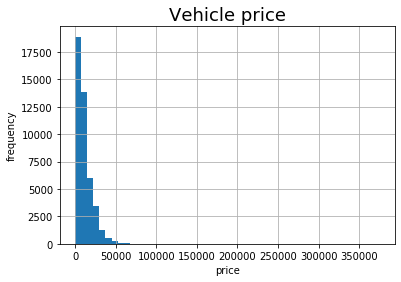

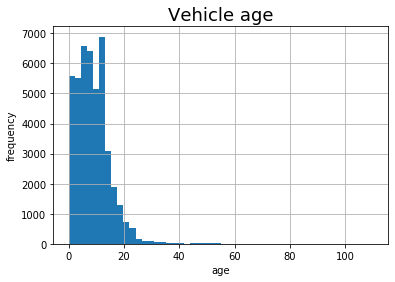

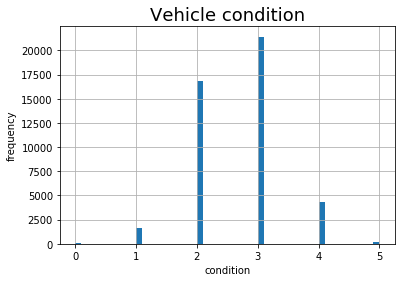

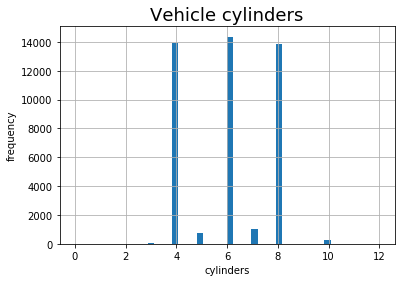

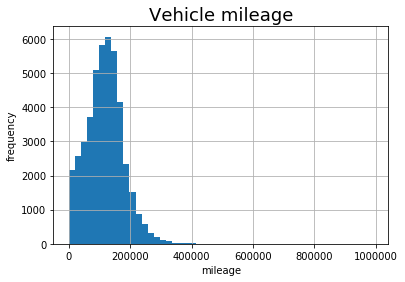

In [66]:
#plotting histograms
import matplotlib.pyplot as plt
df.hist('price', bins = 50, range = (0, 375000))
plt.xlabel('price')
plt.ylabel('frequency')
plt.title("Vehicle price", size=18)
df.hist('age', bins = 50, range = (0,110))
plt.xlabel('age')
plt.ylabel('frequency')
plt.title("Vehicle age", size=18)
df.hist('condition', bins = 50, range = (0, 5))
plt.xlabel('condition')
plt.ylabel('frequency')
plt.title("Vehicle condition", size=18)
df.hist('cylinders', bins = 50, range = (0, 12))
plt.xlabel('cylinders')
plt.ylabel('frequency')
plt.title("Vehicle cylinders", size=18)
df.hist('odometer_fill', bins = 50, range = (0,990000))
plt.xlabel('mileage')
plt.ylabel('frequency')
plt.title("Vehicle mileage", size=18);

We plotted histograms and we can see that data skewed to the right. On price hist there is a gathering around 0 value and from the range to 375000 most prices are no more then 40 000, so mostly we have not expensive cars. On age hist we see that mostly cars <20 years and there is a separeted line 45-55 years which is definetely an outlier. Condition and cylinders look pretty normal. On odometer_fill hist there is concentration around 0 and there is a peak somewhere around 100000.

In [67]:
#we ll figure out higher limits of outliers using Qs and formula with +1.5IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 -Q1
Q3 +1.5*IQR

price                32257.500000
model_year            2026.000000
condition                4.500000
cylinders               14.000000
odometer            285004.000000
is_4wd                   2.500000
days_listed            104.000000
odometer_fill       270795.550456
weekday                 11.000000
month                   20.500000
year                  2020.500000
age                     22.500000
avg_mileage_year     35665.000000
dtype: float64

In [68]:
#storing outliers
outliers_df = df.query(' price > 31745 or model_year > 2026 or condition > 4.5 or cylinders > 14.0 or odometer_fill > 269157 or is_4wd > 2.5 or days_listed >104.0 or weekday >11.0 or month > 20.5 or year> 2020.5 or age> 22.5 or avg_mileage_year> 35678.0')
outliers_df

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,odometer_fill,date,weekday,month,year,age,avg_mileage_year
7,17990.0,2013,ram 1500,3,8,gas,NaN,automatic,pickup,red,True,2018-05-15,111,102735.580337,2018-05-15,1,5,2018,5,20547
12,11499.0,2017,chevrolet malibu,4,4,gas,NaN,automatic,sedan,other,False,2018-07-26,43,48364.237387,2018-07-26,3,7,2018,1,48364
17,11999.0,2017,toyota camry le,3,4,gas,35721.0,automatic,sedan,other,False,2018-09-13,25,35721.000000,2018-09-13,3,9,2018,1,35721
18,3890.0,2011,subaru outback,3,4,gas,300000.0,automatic,SUV,white,True,2018-12-25,31,300000.000000,2018-12-25,1,12,2018,7,42857
19,9500.0,2008,toyota highlander,2,6,gas,149799.0,automatic,SUV,other,False,2018-06-04,121,149799.000000,2018-06-04,0,6,2018,10,14979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44324,21900.0,2013,chevrolet silverado 3500hd,3,8,diesel,203000.0,automatic,truck,white,True,2018-12-27,37,203000.000000,2018-12-27,3,12,2018,5,40600
44325,1200.0,2005,volkswagen jetta,1,5,gas,185000.0,automatic,sedan,grey,False,2018-10-10,158,185000.000000,2018-10-10,2,10,2018,13,14230
44338,7995.0,2011,chevrolet equinox,4,4,gas,111088.0,automatic,SUV,other,False,2019-04-01,175,111088.000000,2019-04-01,0,4,2019,8,13886
44340,20481.0,2018,toyota camry,4,4,gas,38590.0,automatic,sedan,silver,False,2018-12-06,4,38590.000000,2018-12-06,3,12,2018,0,38590


In [69]:
#creating filtered data without outliers
filtered_df = df.query(' 500 < price < 31745 and model_year < 2026 and condition < 4.5 and cylinders < 14.0 and odometer_fill < 269157 and is_4wd < 2.5 and days_listed <104.0 and weekday <11.0 and month < 20.5 and year< 2020.5 and age< 22.5 and avg_mileage_year< 35678.0')
filtered_df 

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,odometer_fill,date,weekday,month,year,age,avg_mileage_year
0,9400.0,2011,bmw x5,2,6,gas,145000.0,automatic,SUV,other,True,2018-06-23,19,145000.000000,2018-06-23,5,6,2018,7,20714
1,25500.0,2011,ford f-150,2,6,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,88705.000000,2018-10-19,4,10,2018,7,12672
2,1500.0,2003,ford f-150,1,8,gas,NaN,automatic,pickup,other,False,2019-03-22,9,163360.599631,2019-03-22,4,3,2019,16,10210
3,14990.0,2014,chrysler 300,3,6,gas,57954.0,automatic,sedan,black,True,2018-06-20,15,57954.000000,2018-06-20,2,6,2018,4,14488
4,9200.0,2008,honda pilot,3,6,gas,147191.0,automatic,SUV,blue,True,2019-02-15,17,147191.000000,2019-02-15,4,2,2019,11,13381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44356,9249.0,2013,nissan maxima,4,6,gas,88136.0,automatic,sedan,black,False,2018-10-03,37,88136.000000,2018-10-03,2,10,2018,5,17627
44357,2700.0,2002,honda civic,0,4,gas,181500.0,automatic,sedan,white,False,2018-11-14,22,181500.000000,2018-11-14,2,11,2018,16,11343
44358,3950.0,2009,hyundai sonata,3,4,gas,128000.0,automatic,sedan,blue,False,2018-11-15,32,128000.000000,2018-11-15,3,11,2018,9,14222
44359,7455.0,2013,toyota corolla,2,4,gas,139573.0,automatic,sedan,black,False,2018-07-02,71,139573.000000,2018-07-02,0,7,2018,5,27914


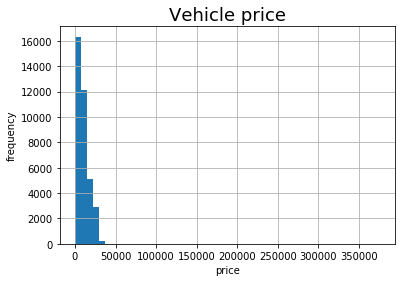

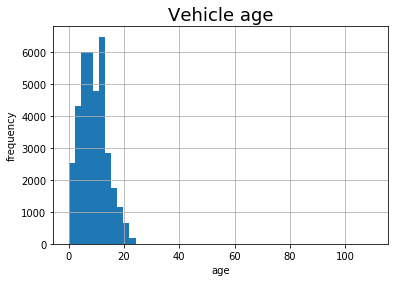

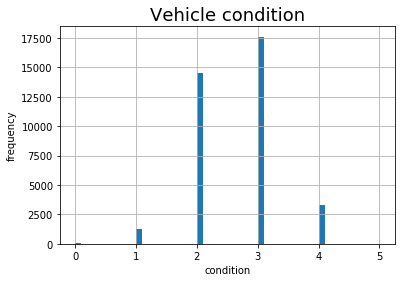

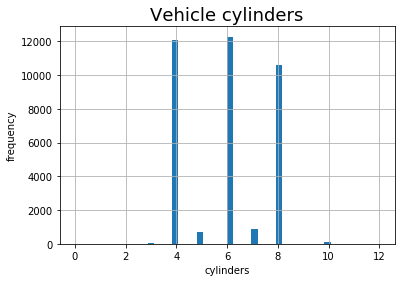

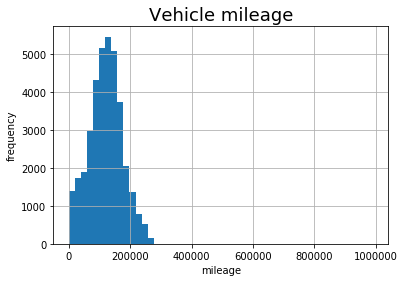

In [70]:
#plotting histograms with filtered data
import matplotlib.pyplot as plt
filtered_df.hist('price', bins = 50, range = (0, 375000))
plt.xlabel('price')
plt.ylabel('frequency')
plt.title("Vehicle price", size=18)
filtered_df.hist('age', bins = 50, range = (0,110))
plt.xlabel('age')
plt.ylabel('frequency')
plt.title("Vehicle age", size=18)
filtered_df.hist('condition', bins = 50, range = (0, 5))
plt.xlabel('condition')
plt.ylabel('frequency')
plt.title("Vehicle condition", size=18)
filtered_df.hist('cylinders', bins = 50, range = (0, 12))
plt.xlabel('cylinders')
plt.ylabel('frequency')
plt.title("Vehicle cylinders", size=18)
filtered_df.hist('odometer_fill', bins = 50, range = (0,990000))
plt.xlabel('mileage')
plt.ylabel('frequency')
plt.title("Vehicle mileage", size=18);

After we filtered outliers the data looks much better, equal spreaded and it's easier to read and understand what's going on. In price hist there is no gathering around 0 because we put the min 500 for the price and the peak is around 5000. At age hist we clearly see the cars age and that the peak is around 7-8 years. In condition hist there is no more value 5, because the higher whisker is 4.5. The odometer_fill looks like normal distributation data and the peak is somewhere between 100000 and 150000.

In [71]:
#we ll investigate a bit more on days_listed
filtered_df['days_listed'].describe()

count    36675.000000
mean        36.414533
std         22.946216
min          0.000000
25%         18.000000
50%         32.000000
75%         51.000000
max        103.000000
Name: days_listed, dtype: float64

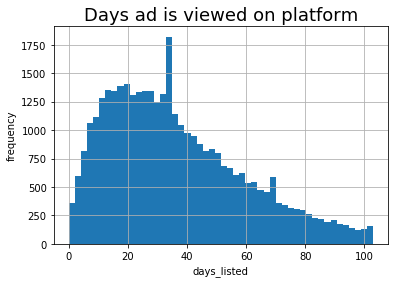

In [72]:
#plotting histogram
filtered_df.hist('days_listed', bins = 50)
plt.xlabel('days_listed')
plt.ylabel('frequency')
plt.title("Days ad is viewed on platform", size=18);

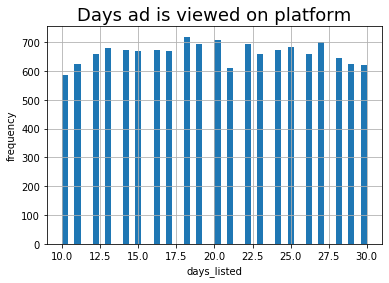

In [73]:
#we can see the steady peak is from 10 to 30 days
filtered_df.hist('days_listed', bins = 50, range = (10,30))
plt.xlabel('days_listed')
plt.ylabel('frequency')
plt.title("Days ad is viewed on platform", size=18);

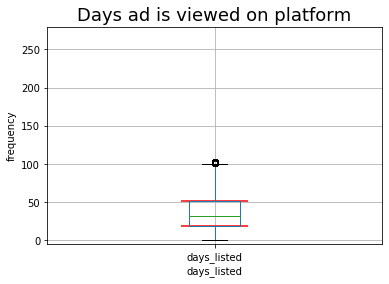

First quartile: 18.0
Third quartile: 51.0
Higher Whisker: 100.5


In [74]:
#we ll plot a boxplot for days_listed
Q1 = filtered_df['days_listed'].quantile(0.25)
Q3 = filtered_df['days_listed'].quantile(0.75)
IQR = Q3 - Q1

import matplotlib.pyplot as plt 
plt.ylim(-5, 280)
filtered_df.boxplot('days_listed')
plt.hlines(y=[Q1, Q3], xmin=0.9, xmax=1.1, color='red')
plt.xlabel('days_listed')
plt.ylabel('frequency')
plt.title("Days ad is viewed on platform", size=18)
plt.show()
print("First quartile:", Q1)
print("Third quartile:", Q3) 
IQR = Q3 - Q1
print("Higher Whisker:", Q3 + 1.5*IQR)

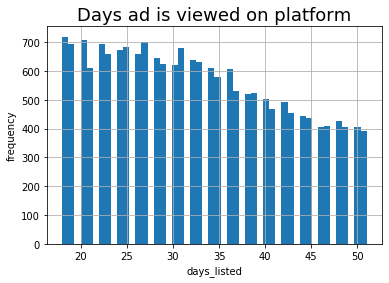

In [75]:
#i would say the normal life of an ad is 18 to 51 days
filtered_df.hist('days_listed', bins = 50, range = (18,51))
plt.xlabel('days_listed')
plt.ylabel('frequency')
plt.title("Days ad is viewed on platform", size=18);

In [76]:
filtered_df['days_listed'].mean()

36.41453306066803

In [77]:
filtered_df['days_listed'].median()

32.0

In [78]:
#we can also build a pivot table to see mean, median, count, max and min for each model and year we have 
days = filtered_df.pivot_table(index = ['model', 'model_year'], values = 'days_listed', aggfunc = ['mean','median', 'count', 'max','min'])
days

mean      median       count         max  \
                             days_listed days_listed days_listed days_listed   
model             model_year                                                   
acura tl          1999         40.666667        50.0           3          52   
                  2001         37.600000        28.0           5         100   
                  2002         55.000000        55.0           2          79   
                  2003         47.200000        37.0          10          99   
                  2004         39.333333        42.0          15          75   
...                                  ...         ...         ...         ...   
volkswagen passat 2014         37.268293        36.0          41          84   
                  2015         41.416667        34.0          24          92   
                  2016         48.000000        56.0           7          78   
                  2017         19.000000         9.0           5          39   
                  2018         56.000000        56.0           1          56   

                                     min  
                             days_listed  
model             model_year              
acura tl          1999                20  
                  2001                 9  
                  2002                31  
                  2003                13  
                  2004                10  
...                                  ...  
volkswagen passat 2014                 7  
                  2015                13  
                  2016                19  
                  2017                 7  
                  2018                56  

[1805 rows x 5 columns]

In [79]:
#we cant count the min outlier, so lets decide that 5 days is too short for the ad
too_short = filtered_df.query('days_listed < 5')


In [80]:
#i think that more then 104 days (higher outlier) is too long for the ad
too_long = filtered_df.query('days_listed > 104')


We studied days_listed and figured out that typical life of ad is between 18 and 51 days, mean is around 36, median is 32 days. And if ad is displayed for less than 5 days it is too short, if for more than 104 days it is too long.

In [81]:
#now we ll investigate on car types
count_bytype = filtered_df['type'].value_counts()
count_bytype

sedan          9633
SUV            9314
truck          7756
pickup         4756
coupe          1353
wagon          1011
mini-van        963
hatchback       829
van             421
convertible     283
other           197
offroad         147
bus              12
Name: type, dtype: int64

In [82]:
#we ll find out average prices for each car type
avg_prices_bytype = filtered_df.pivot_table(index = 'type', values = 'price')
avg_prices_bytype.sort_values(by = 'price', ascending = False)


,price
type,
offroad,14243.680272
truck,14200.698685
bus,13777.833333
convertible,13381.819788
pickup,13229.540791
coupe,11984.195122
SUV,10010.168134
other,9580.487310
wagon,8612.179031


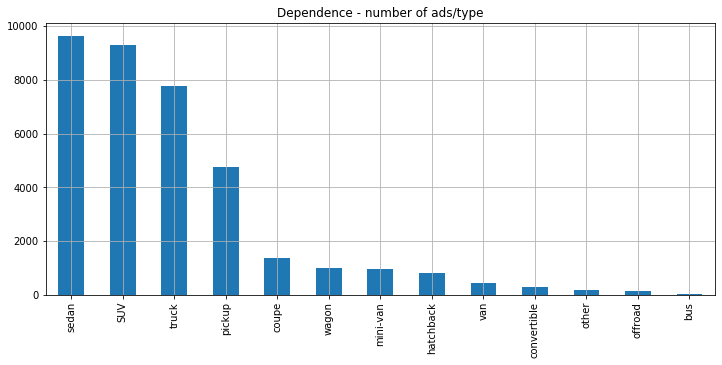

In [83]:
count_bytype.plot( kind = 'bar', title = 'Dependence - number of ads/type', grid=True, figsize=(12,5));

We can see that offroad type has the highest average price. And sedan and SUV have the highest number of ads.

In [84]:
#now we ll try to understand if the price of sedans and SUVs depends on
#age, mileage, condition, transmission and color


SUV = filtered_df.query('type == "SUV"')
sedan = filtered_df.query('type == "sedan"')

suv_color = SUV.groupby('paint_color').filter(lambda grp: len(grp)>49).reset_index()
sedan_color = sedan.groupby('paint_color').filter(lambda grp: len(grp)>49).reset_index()


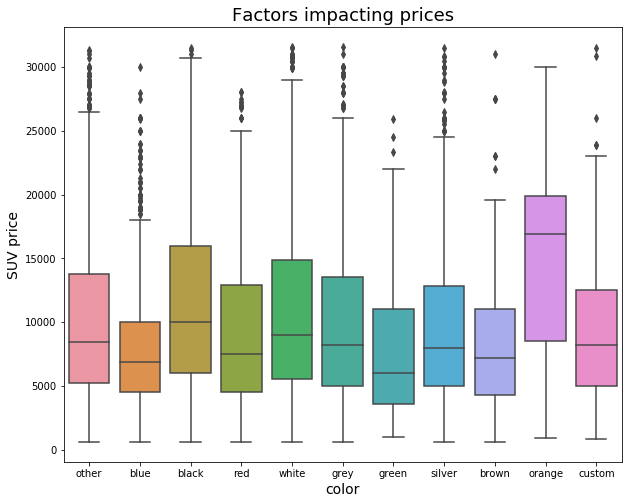

In [85]:
#now we ll make boxplots for SUV
import seaborn as sns 

plt.figure(figsize=(10, 8))
# make boxplot with Seaborn
sns.boxplot(x='paint_color', y="price", data=suv_color)
# Set labels and title
plt.ylabel("SUV price", size=14)
plt.xlabel("color", size=14)
plt.title("Factors impacting prices", size=18)
plt.savefig("simple_boxplot_Seaborn_boxplot_Python.png")

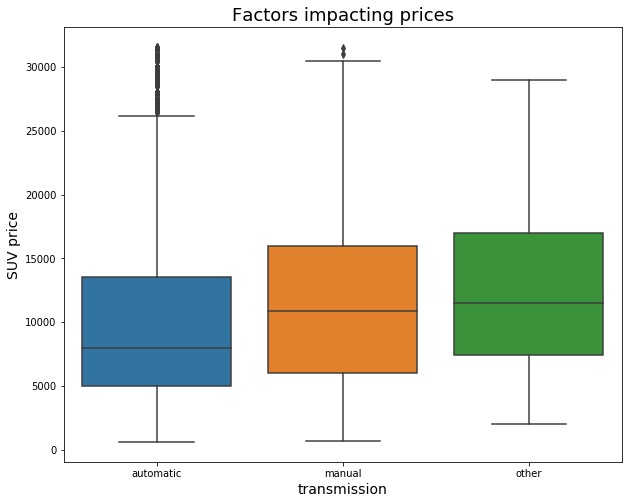

In [86]:
plt.figure(figsize=(10, 8))
# make boxplot with Seaborn
sns.boxplot(x="transmission", y="price", data=SUV)
# Set labels and title
plt.ylabel("SUV price", size=14)
plt.xlabel("transmission", size=14)
plt.title("Factors impacting prices", size=18)
plt.savefig("simple_boxplot_Seaborn_boxplot_Python.png")

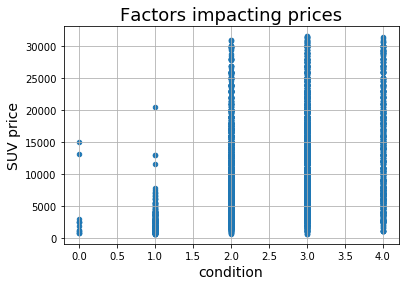

In [87]:
#now we ll make scatterplots for SUV
SUV.plot(x = 'condition', y = 'price', kind = 'scatter', grid = True)
plt.ylabel("SUV price", size=14)
plt.xlabel("condition", size=14)
plt.title("Factors impacting prices", size=18);

In [88]:
#we can see here minor correlation 
SUV['price'].corr(SUV['condition'])

0.31281699886205994

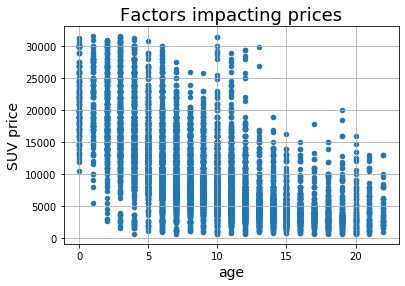

In [89]:
SUV.plot(x = 'age', y = 'price', kind = 'scatter', grid = True)
plt.ylabel("SUV price", size=14)
plt.xlabel("age", size=14)
plt.title("Factors impacting prices", size=18);

In [90]:
#negative correlation shows us that the greater age the less is price
SUV['price'].corr(SUV['age'])

-0.6499513933622102

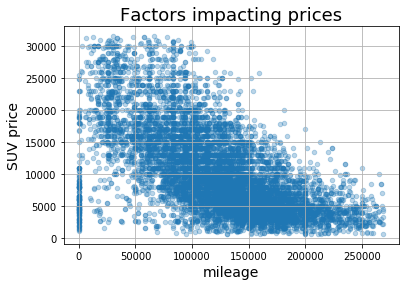

In [91]:
SUV.plot(x = 'odometer_fill', y = 'price', kind = 'scatter', grid = True, alpha=0.3)
plt.ylabel("SUV price", size=14)
plt.xlabel("mileage", size=14)
plt.title("Factors impacting prices", size=18);

In [92]:
#negative correlation shows us that the greater mileage the less is price
SUV['price'].corr(SUV['odometer_fill'])

-0.6090354348277336

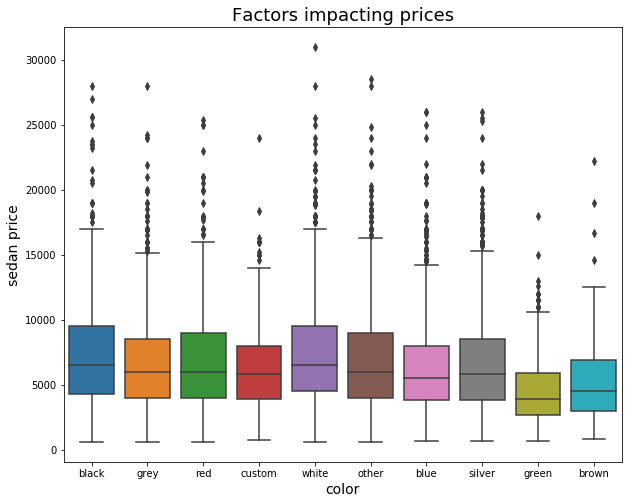

In [93]:
#now we ll make boxplots for sedan
plt.figure(figsize=(10, 8))
# make boxplot with Seaborn
sns.boxplot(x="paint_color", y="price", data=sedan_color)
# Set labels and title
plt.ylabel("sedan price", size=14)
plt.xlabel("color", size=14)
plt.title("Factors impacting prices", size=18)
plt.savefig("simple_boxplot_Seaborn_boxplot_Python.png")

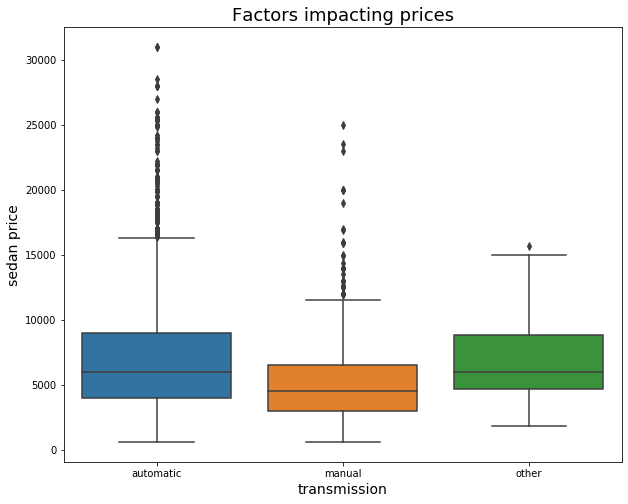

In [94]:
plt.figure(figsize=(10, 8))
# make boxplot with Seaborn
sns.boxplot(x="transmission", y="price", data=sedan)
# Set labels and title
plt.ylabel("sedan price", size=14)
plt.xlabel("transmission", size=14)
plt.title("Factors impacting prices", size=18)
plt.savefig("simple_boxplot_Seaborn_boxplot_Python.png")

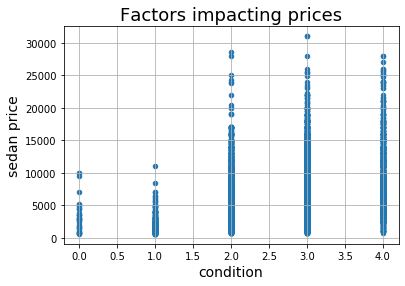

In [95]:
#now we ll make scatterplots for sedan
sedan.plot(x = 'condition', y = 'price', kind = 'scatter', grid = True)
plt.ylabel("sedan price", size=14)
plt.xlabel("condition", size=14)
plt.title("Factors impacting prices", size=18);


In [96]:
#we can see here minor correlation 
sedan['price'].corr(sedan['condition'])

0.330370274430688

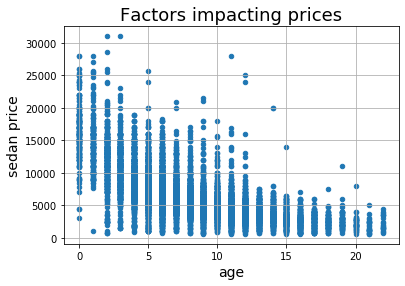

In [97]:
sedan.plot(x = 'age', y = 'price', kind = 'scatter', grid = True)
plt.ylabel("sedan price", size=14)
plt.xlabel("age", size=14)
plt.title("Factors impacting prices", size=18);

In [98]:
#negative correlation shows us that the greater age the less is price
sedan['price'].corr(sedan['age'])

-0.672565210707752

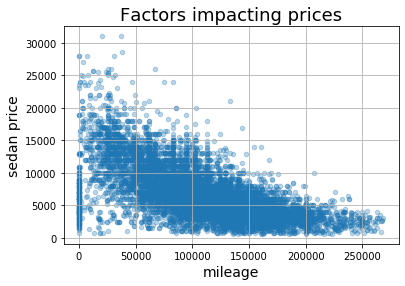

In [99]:
sedan.plot(x = 'odometer_fill', y = 'price', kind = 'scatter', grid = True, alpha=0.3)
plt.ylabel("sedan price", size=14)
plt.xlabel("mileage", size=14)
plt.title("Factors impacting prices", size=18);

In [100]:
#negative correlation shows us that the greater mileage the less is price
sedan['price'].corr(sedan['odometer_fill'])

-0.6312870189950655

We can see that for SUV type the most expensive cars are orange, white and silver. 
For sedan type we can see the most expensive cars are white, black and silver. 
White, silver and black is the most popular choice among people.
The correlation with condition is minor and we can see that cars in excellent and like new condition have almost the same prices, both in SUV and sedan types.
It is a different situation with car's age. We see correlation here. Mostly the older car the lower price, for both types.
For both types we can see that mileage also affects the price. The higher mileage the lower price of vehicle.
Regarding transmission - all types mostly on the same level of pricing, for both, SUV and sedan.



### Step 5. Overall conclusion

My opinion is that price of vehicles for 2 types with the greatest number of ads is affected mostly by age and mileage, less affected by paint color, minor affected by condition and not affected by transmission type.

### Project completion checklist

Mark the completed tasks with 'x'. Then press Shift+Enter.

- [x]  file opened
- [x]  files explored (first rows printed, info() method)
- [x]  missing values determined
- [x]  missing values filled in
- [x]  clarification of the discovered missing values provided
- [x]  data types converted
- [x]  explanation of which columns had the data types changed and why
- [x]  calculated and added to the table: day of the week, month, and year the ad was placed
- [x]  calculated and added to the table: the vehicle's age (in years) when the ad was placed
- [x]  calculated and added to the table: the vehicle's average mileage per year
- [x]  the following parameters investigated: price, vehicle's age when the ad was placed, mileage, number of cylinders, and condition
- [x]  histograms for each parameter created
- [x]  task completed: "Determine the upper limits of outliers, remove the outliers and store them in a separate DataFrame, and continue your work with the filtered data."
- [x]  task completed: "Use the filtered data to plot new histograms. Compare them with the earlier histograms (the ones that included outliers). Draw conclusions for each histogram."
- [x]  task completed: "Study how many days advertisements were displayed (days_listed). Plot a histogram. Calculate the mean and median. Describe the typical lifetime of an ad. Determine when ads were removed quickly, and when they were listed for an abnormally long time.  "
- [x]  task completed: "Analyze the number of ads and the average price for each type of vehicle. Plot a graph showing the dependence of the number of ads on the vehicle type. Select the two types with the greatest number of ads. "
- [x]  task completed: "What factors impact the price most? Take each of the popular types you detected at the previous stage and study whether the price depends on age, mileage, condition, transmission type, and color. For categorical variables (transmission type and color), plot box-and-whisker charts, and create scatterplots for the rest. When analyzing categorical variables, note that the categories must have at least 50 ads; otherwise, their parameters won't be valid for analysis.  "
- [x]  each stage has a conclusion
- [x]  overall conclusion drawn